In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
hair_dryer_df = pd.read_csv('Problem_C_Data/hair_dryer.tsv', sep='\t')
microwave_df = pd.read_csv('Problem_C_Data/microwave.tsv', sep='\t')
pacifier_df = pd.read_csv('Problem_C_Data/pacifier.tsv', sep='\t')

In [6]:
hair_dryer_df.info()
hair_dryer_df.isnull().sum()
hair_dryer_df.describe()

hair_dryer_df.dropna(subset=['review_body', 'review_date'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 11469 entries, 0 to 11469
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        11469 non-null  object
 1   customer_id        11469 non-null  int64 
 2   review_id          11469 non-null  object
 3   product_id         11469 non-null  object
 4   product_parent     11469 non-null  int64 
 5   product_title      11469 non-null  object
 6   product_category   11469 non-null  object
 7   star_rating        11469 non-null  int64 
 8   helpful_votes      11469 non-null  int64 
 9   total_votes        11469 non-null  int64 
 10  vine               11469 non-null  object
 11  verified_purchase  11469 non-null  object
 12  review_headline    11467 non-null  object
 13  review_body        11469 non-null  object
 14  review_date        11469 non-null  object
dtypes: int64(5), object(10)
memory usage: 1.4+ MB


In [9]:
microwave_df.info()
microwave_df.isnull().sum()
microwave_df.describe()

microwave_df.dropna(subset=['review_body', 'review_date'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        1615 non-null   object
 1   customer_id        1615 non-null   int64 
 2   review_id          1615 non-null   object
 3   product_id         1615 non-null   object
 4   product_parent     1615 non-null   int64 
 5   product_title      1615 non-null   object
 6   product_category   1615 non-null   object
 7   star_rating        1615 non-null   int64 
 8   helpful_votes      1615 non-null   int64 
 9   total_votes        1615 non-null   int64 
 10  vine               1615 non-null   object
 11  verified_purchase  1615 non-null   object
 12  review_headline    1615 non-null   object
 13  review_body        1615 non-null   object
 14  review_date        1615 non-null   object
dtypes: int64(5), object(10)
memory usage: 189.4+ KB


In [10]:
pacifier_df.info()
pacifier_df.isnull().sum()
pacifier_df.describe()

pacifier_df.dropna(subset=['review_body', 'review_date'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        18939 non-null  object
 1   customer_id        18939 non-null  int64 
 2   review_id          18939 non-null  object
 3   product_id         18939 non-null  object
 4   product_parent     18939 non-null  int64 
 5   product_title      18939 non-null  object
 6   product_category   18939 non-null  object
 7   star_rating        18939 non-null  int64 
 8   helpful_votes      18939 non-null  int64 
 9   total_votes        18939 non-null  int64 
 10  vine               18939 non-null  object
 11  verified_purchase  18939 non-null  object
 12  review_headline    18939 non-null  object
 13  review_body        18937 non-null  object
 14  review_date        18939 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.2+ MB


### 1. Track the market rating distribution

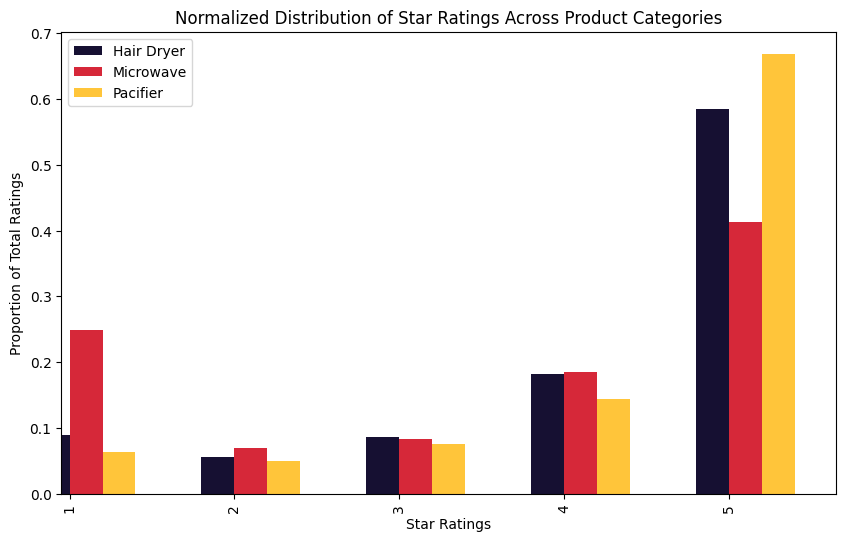

In [52]:
colors = ['#161032', '#D62839', '#FFC53A']
fig, ax = plt.subplots(figsize=(10, 6))

hair_dryer_ratings = hair_dryer_df['star_rating'].value_counts(normalize=True).sort_index()
microwave_ratings = microwave_df['star_rating'].value_counts(normalize=True).sort_index()
pacifier_ratings = pacifier_df['star_rating'].value_counts(normalize=True).sort_index()


hair_dryer_ratings.plot(kind='bar', ax=ax, width=0.2, position=1, label='Hair Dryer', color=colors[0])
microwave_ratings.plot(kind='bar', ax=ax, width=0.2, position=0, label='Microwave', color=colors[1])
pacifier_ratings.plot(kind='bar', ax=ax, width=0.2, position=-1, label='Pacifier', color=colors[2])

ax.set_title('Normalized Distribution of Star Ratings Across Product Categories')
ax.set_xlabel('Star Ratings')
ax.set_ylabel('Proportion of Total Ratings')

ax.legend()

plt.show()

### 2. Track the average trend of the market for review count

array([<Axes: xlabel='review_date'>, <Axes: xlabel='review_date'>],
      dtype=object)

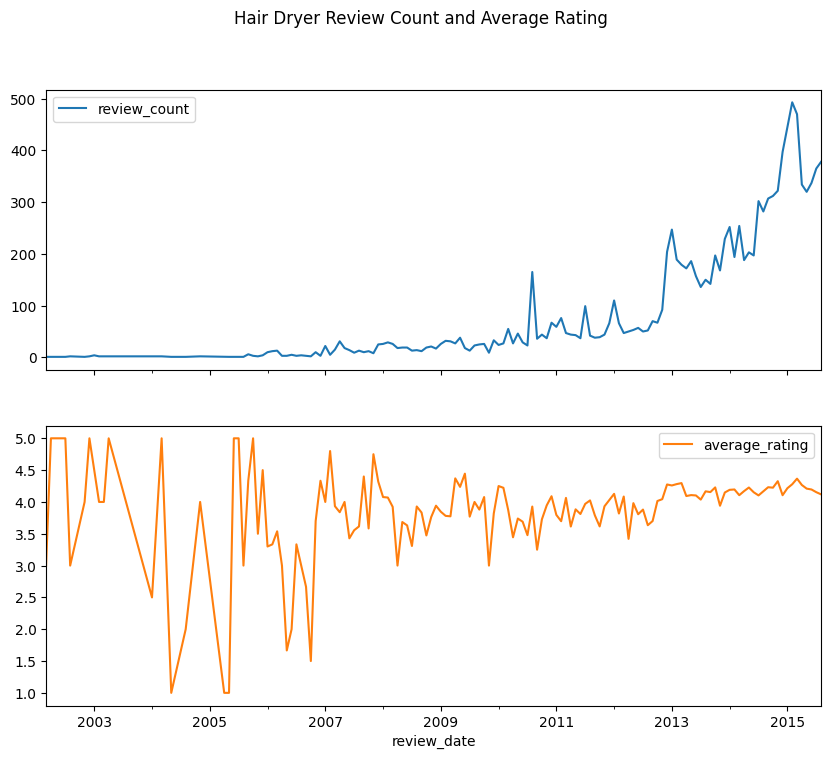

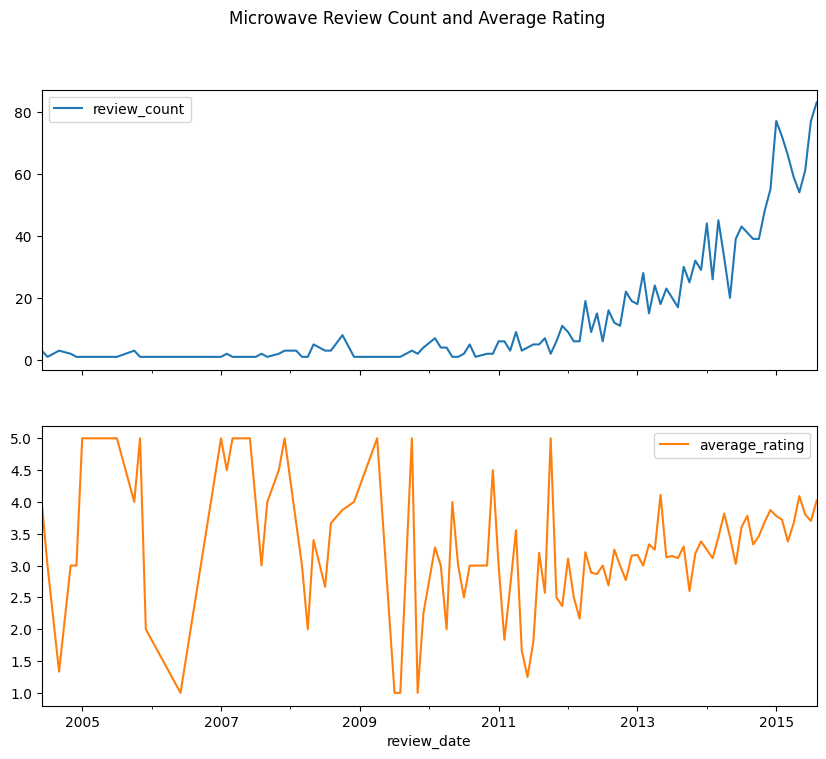

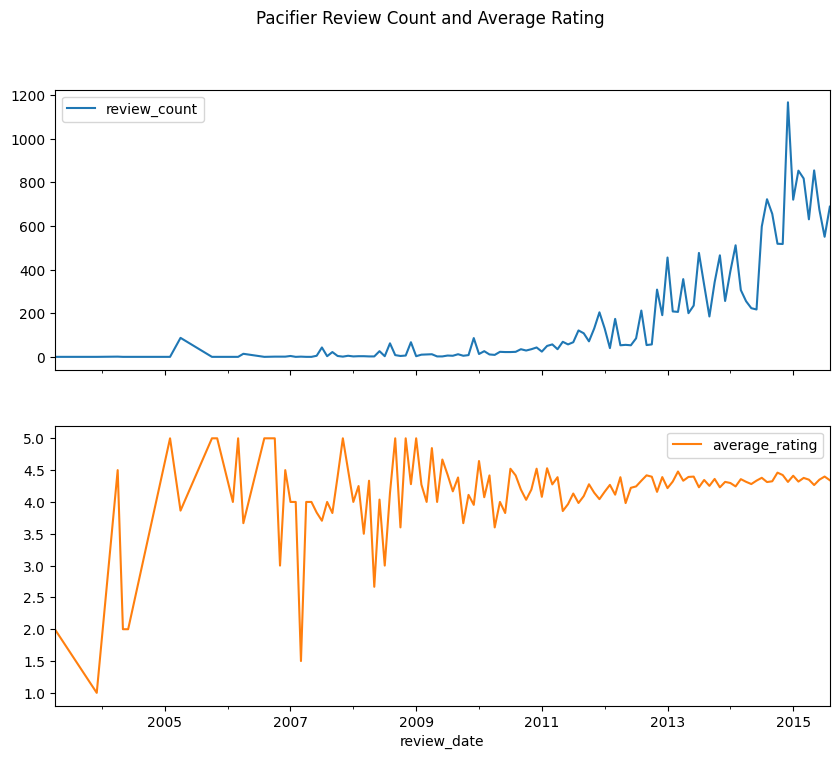

In [59]:
hair_dryer_df['review_date'] = pd.to_datetime(hair_dryer_df['review_date'])
microwave_df['review_date'] = pd.to_datetime(microwave_df['review_date'])
pacifier_df['review_date'] = pd.to_datetime(pacifier_df['review_date'])

def get_time_analysis(df: pd.DataFrame):
    return df.groupby(df['review_date'].dt.to_period("M")).agg({
        'review_id': 'count',
        'star_rating': 'mean'
    }).rename(columns={'review_id': 'review_count', 'star_rating': 'average_rating'})

hair_time_analysis = get_time_analysis(hair_dryer_df)
micro_time_analysis = get_time_analysis(microwave_df)
paci_time_analysis = get_time_analysis(pacifier_df)

hair_time_analysis.plot(subplots=True, figsize=(10,8), title="Hair Dryer Review Count and Average Rating")
micro_time_analysis.plot(subplots=True, figsize=(10,8), title="Microwave Review Count and Average Rating")
paci_time_analysis.plot(subplots=True, figsize=(10,8), title="Pacifier Review Count and Average Rating")

### 3. Track the sentiment of the market

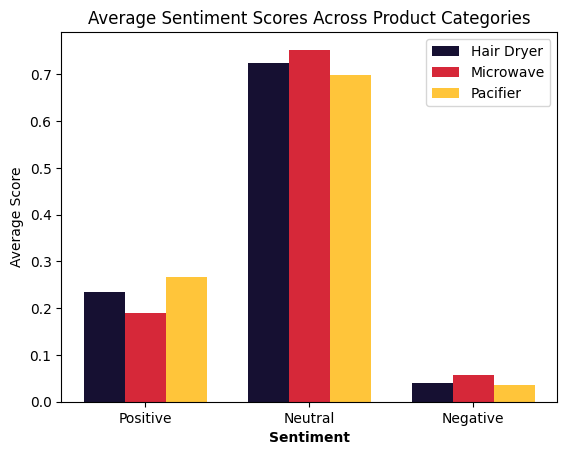

In [118]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sid.polarity_scores(text)

hair_dryer_df['sentiments'] = hair_dryer_df['review_body'].apply(get_sentiment)
microwave_df['sentiments'] = microwave_df['review_body'].apply(get_sentiment)
pacifier_df['sentiments'] = pacifier_df['review_body'].apply(get_sentiment)

hair_dryer_df['_positive'] = hair_dryer_df['sentiments'].apply(lambda x: x['pos'])
hair_dryer_df['_neutral'] = hair_dryer_df['sentiments'].apply(lambda x: x['neu'])
hair_dryer_df['_negative'] = hair_dryer_df['sentiments'].apply(lambda x: x['neg'])

microwave_df['_positive'] = microwave_df['sentiments'].apply(lambda x: x['pos'])
microwave_df['_neutral'] = microwave_df['sentiments'].apply(lambda x: x['neu'])
microwave_df['_negative'] = microwave_df['sentiments'].apply(lambda x: x['neg'])

pacifier_df['_positive'] = pacifier_df['sentiments'].apply(lambda x: x['pos'])
pacifier_df['_neutral'] = pacifier_df['sentiments'].apply(lambda x: x['neu'])
pacifier_df['_negative'] = pacifier_df['sentiments'].apply(lambda x: x['neg'])

barWidth = 0.25
r1 = np.arange(len(hair_dryer_df[['_positive', '_neutral', '_negative']].mean()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


plt.bar(r1, hair_dryer_df[['_positive', '_neutral', '_negative']].mean(), color=colors[0], width=barWidth, label='Hair Dryer')
plt.bar(r2, microwave_df[['_positive', '_neutral', '_negative']].mean(), color=colors[1], width=barWidth, label='Microwave')
plt.bar(r3, pacifier_df[['_positive', '_neutral', '_negative']].mean(), color=colors[2], width=barWidth, label='Pacifier')

plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(hair_dryer_df[['_positive', '_neutral', '_negative']].mean()))], ['Positive', 'Neutral', 'Negative'])
plt.ylabel('Average Score')
plt.title('Average Sentiment Scores Across Product Categories')

plt.legend()

plt.show()

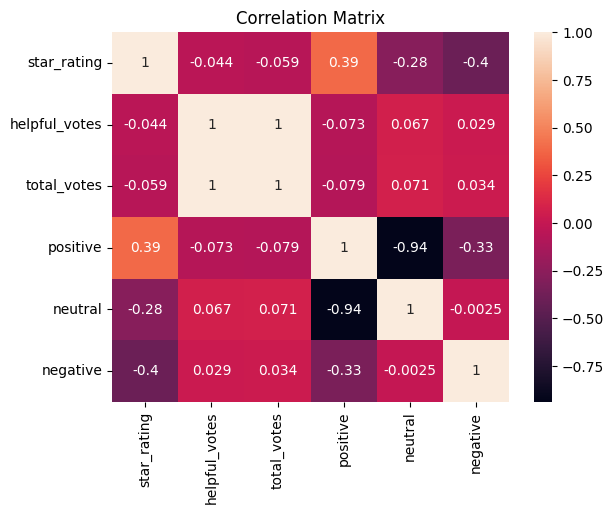

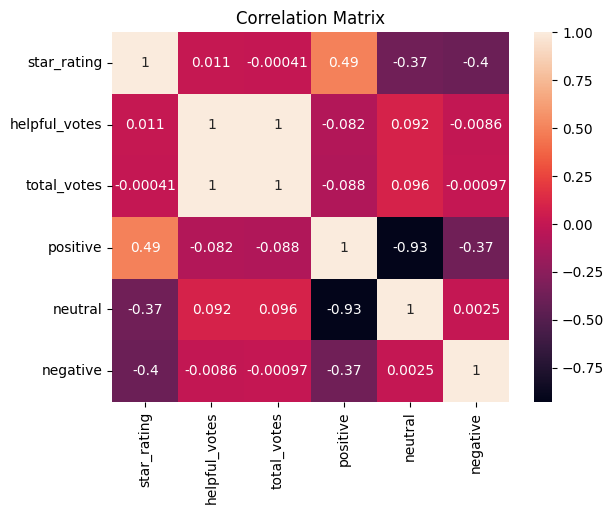

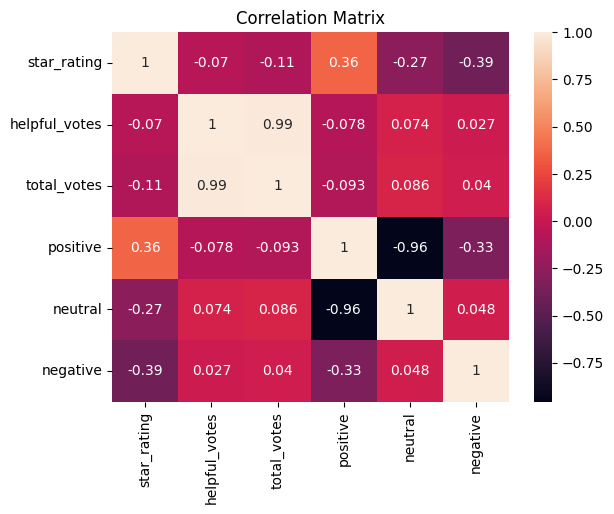

In [119]:
# Correlation heatmap
sns.heatmap(hair_dryer_df[['star_rating', 'helpful_votes', 'total_votes', 'positive', 'neutral', 'negative']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Correlation heatmap
sns.heatmap(microwave_df[['star_rating', 'helpful_votes', 'total_votes', 'positive', 'neutral', 'negative']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


sns.heatmap(pacifier_df[['star_rating', 'helpful_votes', 'total_votes', 'positive', 'neutral', 'negative']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

It also shows a correlation between negetive and positive with the star rating. Hence, tracking the sentiment score for sunshine products also help analysis for product performance

In [120]:
def tokenize(text):
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [
        word for word in tokens if word.isalpha() and word not in stop_words
    ]
    return ' '.join(filtered_tokens)

def calculate_helpfulness_ratio(row):
    if row['total_votes'] > 0:
        return row['helpful_votes'] / row['total_votes']
    else:
        return 0
    

hair_dryer_df['tokenized'] = hair_dryer_df['review_body'].apply(lambda x: tokenize(str(x)))
microwave_df['tokenized'] = microwave_df['review_body'].apply(lambda x: tokenize(str(x)))
pacifier_df['tokenized'] = pacifier_df['review_body'].apply(lambda x: tokenize(str(x)))

hair_dryer_df['helpfulness_ratio'] = hair_dryer_df.apply(calculate_helpfulness_ratio, axis=1)
microwave_df['helpfulness_ratio'] = microwave_df.apply(calculate_helpfulness_ratio, axis=1)
pacifier_df['helpfulness_ratio'] = pacifier_df.apply(calculate_helpfulness_ratio, axis=1)

In [121]:
hair_dryer_df.dtypes

marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
sentiments                   object
positive                    float64
neutral                     float64
negative                    float64
tokenized                    object
helpfulness_ratio           float64
_positive                   float64
_neutral                    float64
_negative                   float64
dtype: object

In [131]:
vectorizer = CountVectorizer(max_features=100, binary=True)
hair_token_matrix = vectorizer.fit_transform(hair_dryer_df['tokenized'])
hair_token_df = pd.DataFrame(hair_token_matrix.toarray(), columns=vectorizer.get_feature_names_out())

micro_token_matrix = vectorizer.fit_transform(microwave_df['tokenized'])
micro_token_df = pd.DataFrame(micro_token_matrix.toarray(), columns=vectorizer.get_feature_names_out())

paci_token_matrix = vectorizer.fit_transform(pacifier_df['tokenized'])
paci_token_df = pd.DataFrame(paci_token_matrix.toarray(), columns=vectorizer.get_feature_names_out())


hair_features_df = hair_dryer_df[['helpful_votes', 'total_votes', 'helpfulness_ratio', '_positive', '_neutral', '_negative']].join(hair_token_df)
hair_features_df.fillna(0, inplace=True)

micro_features_df = microwave_df[['helpful_votes', 'total_votes', 'helpfulness_ratio', '_positive', '_neutral', '_negative']].join(micro_token_df)
micro_features_df.fillna(0, inplace=True)

paci_features_df = pacifier_df[['helpful_votes', 'total_votes', 'helpfulness_ratio', '_positive', '_neutral', '_negative']].join(paci_token_df)
paci_features_df.fillna(0, inplace=True)

### Hair Dryer PCA

Original shape: (11469, 106)
Reduced shape: (11469, 2)
Explained variance ratio with 2 components: [0.06534394 0.0222989 ]
Total variance captured by first 2 components: 8.76%


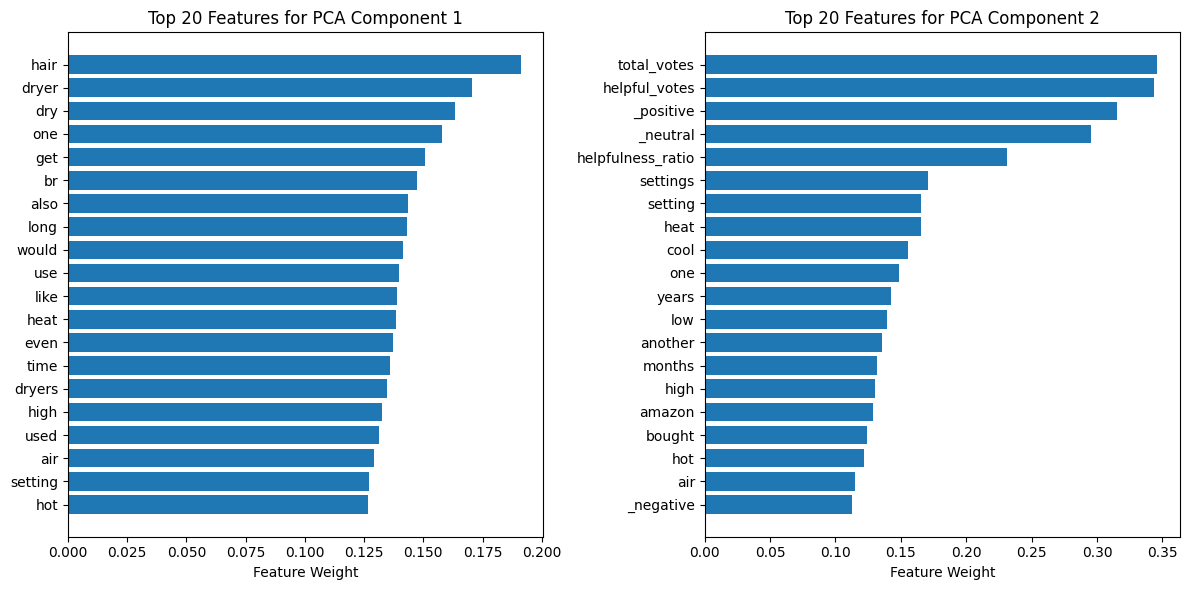

In [161]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(hair_features_df)

pca = PCA(n_components=2)
pca.fit(features_scaled)

X_pca = pca.transform(features_scaled)
print("Original shape: {}".format(str(features_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

print("Explained variance ratio with 2 components: {}".format(pca.explained_variance_ratio_))
print("Total variance captured by first 2 components: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))


components_abs = np.abs(pca.components_)

top_features = {n: [] for n in range(components_abs.shape[0])}
for idx, component in enumerate(components_abs):
    feature_indices = component.argsort()[-20:][::-1]
    top_features[idx] = [(hair_features_df.columns[i], component[i]) for i in feature_indices]

plt.figure(figsize=(12, 6))

for idx, (component, features) in enumerate(top_features.items()):
    features_sorted, scores_sorted = zip(*features)
    plt.subplot(1, 2, idx+1)
    plt.barh(range(20), scores_sorted, align='center')
    plt.yticks(range(20), features_sorted)
    plt.xlabel('Feature Weight')
    plt.title(f'Top 20 Features for PCA Component {idx+1}')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The PCA was able to only capture 8.7% of variance with 2 compoents.

Those two components shows the most influencial information was stored in

1. total_votes
2. helpful_votes
3. _positive
4. _neutral
5. helpfulness_ration
6. hair
7. dryer


The following showcases, the importance of those columns, hence recommended for tracking.

Some interesting observations in addition to above is keywords such as
1. setting
2. cool
3. heat
4. dry

and other words were influencial words, hence showcase the importance of those words 

### Microwave PCA

Original shape: (1615, 106)
Reduced shape: (1615, 2)
Explained variance ratio with 2 components: [0.09087934 0.0377011 ]
Total variance captured by first 2 components: 12.86%


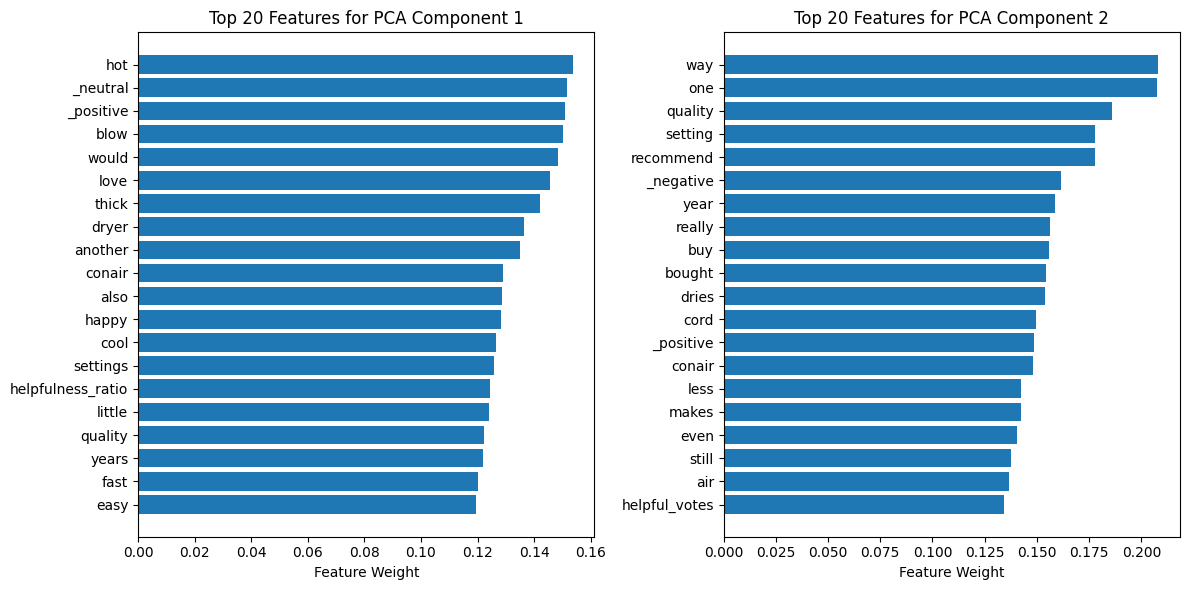

In [164]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(micro_features_df)

pca = PCA(n_components=2)
pca.fit(features_scaled)

X_pca = pca.transform(features_scaled)
print("Original shape: {}".format(str(features_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

print("Explained variance ratio with 2 components: {}".format(pca.explained_variance_ratio_))
print("Total variance captured by first 2 components: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))


components_abs = np.abs(pca.components_)

top_features = {n: [] for n in range(components_abs.shape[0])}
for idx, component in enumerate(components_abs):
    feature_indices = component.argsort()[-20:][::-1]
    top_features[idx] = [(hair_features_df.columns[i], component[i]) for i in feature_indices]

plt.figure(figsize=(12, 6))

for idx, (component, features) in enumerate(top_features.items()):
    features_sorted, scores_sorted = zip(*features)
    plt.subplot(1, 2, idx+1)
    plt.barh(range(20), scores_sorted, align='center')
    plt.yticks(range(20), features_sorted)
    plt.xlabel('Feature Weight')
    plt.title(f'Top 20 Features for PCA Component {idx+1}')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Microwave The PCA was able to only capture 12.8% of variance with 2 compoents.

Those two components shows the most influencial information was stored in

1. hot
2. way
3. one
4. _neutral
5. _positive
6. quality
7. setting
8. blow


The following showcases, the importance of those columns, hence recommended for tracking. For competiters and in the market as a whole

Some interesting observations in addition to above is keywords such as
1. thick
2. cool
3. dries
4. conair

and other words were influencial words, hence showcase the importance of those words 

### Pacifer PCA

Original shape: (18937, 106)
Reduced shape: (18937, 2)
Explained variance ratio with 2 components: [0.05707088 0.0217867 ]
Total variance captured by first 2 components: 7.89%


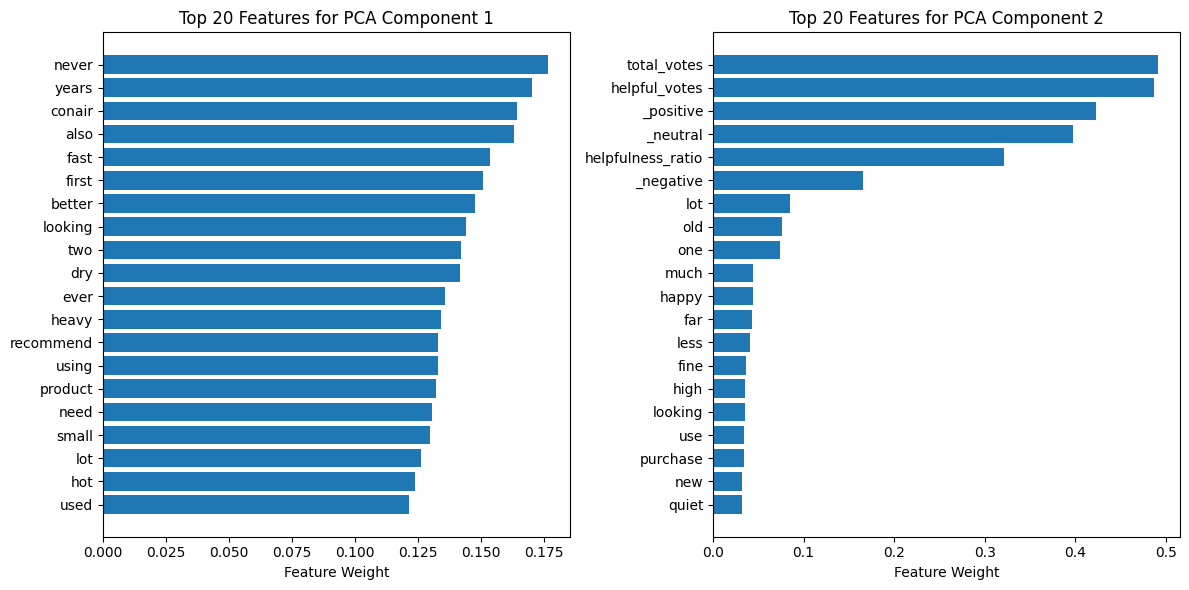

In [165]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(paci_features_df)

pca = PCA(n_components=2)
pca.fit(features_scaled)

X_pca = pca.transform(features_scaled)
print("Original shape: {}".format(str(features_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

print("Explained variance ratio with 2 components: {}".format(pca.explained_variance_ratio_))
print("Total variance captured by first 2 components: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))


components_abs = np.abs(pca.components_)

top_features = {n: [] for n in range(components_abs.shape[0])}
for idx, component in enumerate(components_abs):
    feature_indices = component.argsort()[-20:][::-1]
    top_features[idx] = [(hair_features_df.columns[i], component[i]) for i in feature_indices]

plt.figure(figsize=(12, 6))

for idx, (component, features) in enumerate(top_features.items()):
    features_sorted, scores_sorted = zip(*features)
    plt.subplot(1, 2, idx+1)
    plt.barh(range(20), scores_sorted, align='center')
    plt.yticks(range(20), features_sorted)
    plt.xlabel('Feature Weight')
    plt.title(f'Top 20 Features for PCA Component {idx+1}')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The Pacifier PCA was able to only capture 7.8% of variance with 2 compoents.

Those two components shows the most influencial information was stored in

1. total_votes
2. helpful_votes
3. _positive
4. _neutral
5. _helpness_ratio
6. _negative
7. never
8. years


The following showcases, the importance of those columns, hence recommended for tracking. For competiters and in the market as a whole

Some interesting observations in addition to above is keywords such as
1. heavy
2. dry
3. looking
4. small

and other words were influencial words, hence showcase the importance of those words 

In [168]:
hair_dryer_df.dtypes

marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
sentiments                   object
positive                    float64
neutral                     float64
negative                    float64
tokenized                    object
helpfulness_ratio           float64
_positive                   float64
_neutral                    float64
_negative                   float64
dtype: object

In [173]:
# We can use it for md_question_three
from sklearn.decomposition import LatentDirichletAllocation

In [174]:
text_data = hair_dryer_df['tokenized'].dropna()

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(text_data)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
great product good works price dryer wife excellent recommend love
Topic 1:
dryer hair small light wall easy use like great bathroom
Topic 2:
dryer cord hair love like great retractable years blow br
Topic 3:
hair dryer br dry blow time like use love long
Topic 4:
dryer hair use months bought years used working br time


In [175]:
text_data = microwave_df['tokenized'].dropna()

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(text_data)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
microwave great works space small easy good use kitchen love
Topic 1:
microwave service new ge years door buy product warranty bought
Topic 2:
microwave unit br paint use like oven door inside good
Topic 3:
br microwave oven time use cooking cook like unit button
Topic 4:
br microwave unit buy holes box screws install reviews old


In [176]:
text_data = pacifier_df['tokenized'].dropna()

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(text_data)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
baby great like product pacifiers good pacifier br nipple use
Topic 1:
seat easy great use bag car love baby diaper fit
Topic 2:
baby use bottles gift bottle time bought great like product
Topic 3:
br like baby product little color colors great perfect looks
Topic 4:
pacifier baby loves pacifiers love son cute mouth daughter little


# Overall Statement

[TODO]